# Indian Start-up Funding Analysis

HYPOTHESIS:
Indian startup Ecosystem is being championed by the Technology Sector


QUESTIONS:
1.	Who are the top 10 startups based on total funds received
2.	What is the yearly trend in the number of startups funded
3.	What is the yearly trend in the total funds raised by startups
4.	What sector has the maximum number of startups
5.  What sector raised the highest amount of fund
6.	Which cities have the maximum number of startups
7.	What are the most common investment types
8.	Who are the top investors by number of startups funded	


### Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading and Reading the dataset  from Data Folder

In [3]:
# Loading dataset for each year
data_2018 = pd.read_csv('Data/startup_funding2018.csv')
data_2019 = pd.read_csv('Data/startup_funding2019.csv')
data_2020 = pd.read_csv('Data/startup_funding2020.csv')
data_2021 = pd.read_csv('Data/startup_funding2021.csv')

### Exploring the dataset

In [4]:
data_2018.head() # Viewing the upper portion of the 2018 data to explore the content

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [5]:
data_2019.head() # Viewing the upper portion of the 2019 data to explore the content

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [6]:
data_2020.head() # Viewing the upper portion of the 2020 data to explore the content

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,—,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [7]:
data_2021.head() # Viewing the upper portion of the 2021 data to explore the content

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### Merging Dataset
Since the data of each year is separated, we have to merge it together as one file in order to work with them. Also since there is no column for the date/year each company received funding, we have to create a column for 'Funding_year' so that we can fill in the year each startup received funding before we merge the data, in order not to lose an important feature of the data after merging it.

In [8]:
# Creating a column 'Funding_year' and filling in the year each startup received funding
data_2018['Funding_year']= 2018
data_2019['Funding_year']= 2019
data_2020['Funding_year']= 2020
data_2021['Funding_year']= 2021

#### Reading Data to check added Columns (Funding_year)

In [9]:
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,"$7,500.00","Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [10]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding_year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,2019


In [11]:
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,Funding_year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,—,Pre-seed,NaN,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN,2020
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN,2020


In [12]:
data_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,"$3,000,000",Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,"$20,000,000",Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,"$55,000,000",Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital","$26,000,000",Series B,2021


#### Now that we have added column for Funding_year, we can go ahead to merge the data. But before that, we have to check if all the column names tallies for the four dataset by checking the features of the columns

In [13]:
data_2018.info() #Checking column information for 2018 data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Funding_year   526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [14]:
data_2019.info() #Checking column information for 2019 data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   Funding_year   89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [15]:
data_2020.info() #Checking column information for 2020 data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
 10  Funding_year   1055 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 90.8+ KB


In [16]:
data_2021.info() #Checking column information for 2021 data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1143 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          782 non-null    object 
 9   Funding_year   1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


#### From the information on the columns above, we can see that the features of the 2018 dataset differs from the remaining years as it has 7 columns and different column names. we can also see that data_2020 has one unnamed column with only two non-null cells. so before we merge the data:
- We will drop the unnamed column in data_2020 as it is irrelevant to our study
- We will rename the colums for data_2018 to look same as that of 2019,2020 and 2021

In [17]:
#Dropping the unnamed colums in data_2020
if 'Unnamed: 9' in data_2020.columns:
    data_2020.drop('Unnamed: 9', axis=1, inplace=True)

In [18]:
data_2020.info()  #Checking column information of data_2020 to see if unnamed column has been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Funding_year   1055 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 82.5+ KB


In [19]:
#Renaming columns for data_2018
data_2018.rename(
columns={"Company Name": "Company/Brand", "Industry": "Sector", "Round/Series": "Stage", "Amount": "Amount($)", "Location": "HeadQuarter", "About Company": "What it does"  }
,inplace= True)

In [20]:
data_2018.info() #Viewing data_2018 information to check renamed columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  526 non-null    object
 1   Sector         526 non-null    object
 2   Stage          526 non-null    object
 3   Amount($)      526 non-null    object
 4   HeadQuarter    526 non-null    object
 5   What it does   526 non-null    object
 6   Funding_year   526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


### Merging/ Concatenating data into one file

In [21]:
# Merging all the four dataset
columns = [data_2018, data_2019, data_2020, data_2021]
data=pd.concat(columns)

In [22]:
data # Printing data to check concatenated data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,"$3,000,000",Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,"$20,000,000",New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,"$55,000,000",Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,"$26,000,000",Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


###### After visualising the concatenated data, it was realised that the data has a total of 2879 rows, but the last row in the data has an index 1208. This may be as a result of the rows maintaining the index from the precious unmerged datasets. So let us employ value count for the index to check duplicat indexes.

In [23]:
data.index.value_counts().head(10) # Checking if some indexes are duplicated

0     4
67    4
65    4
64    4
63    4
62    4
61    4
60    4
59    4
58    4
dtype: int64

In [24]:
# Reseting index and dropping the original indexes
data.reset_index(drop=True, inplace=True)

In [25]:
data.index.value_counts().head(10) # Checking to see if duplicate indexes are dropped

0       1
1934    1
1914    1
1915    1
1916    1
1917    1
1918    1
1919    1
1920    1
1921    1
dtype: int64

### Visualizing the features of the Data/ columns

In [26]:
print('Data contains',data.shape[0],'rows and',data.shape[1],'columns',sep=' ')  

Data contains 2879 rows and 10 columns


In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2879 non-null   object
 1   Sector         2861 non-null   object
 2   Stage          1942 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2765 non-null   object
 5   What it does   2879 non-null   object
 6   Funding_year   2879 non-null   int64 
 7   Founded        2111 non-null   object
 8   Founders       2334 non-null   object
 9   Investor       2249 non-null   object
dtypes: int64(1), object(9)
memory usage: 225.0+ KB
None


From the above output, we can observe that all the data has missing values except 3 columns. So in the data cleaning process, we may choose to fill those missing values with some methods, or ignore them if necessary.

### Features Description

Company/Brand: Name of the company/start-up

Sector: Sector of service

Stage: Round of funding reached

Amount($): Raised fund

HeadQuarter: Location of company

What it does: Description about Company

Funding_year: Year company received funding

Founded: Year start-up was founded

Founders: Founders of the Company

Investor: Investors





# Data Cleaning

Firstly, let us find out the frequency of missing data in each column along with their percentages.

In [28]:
null_values=pd.isnull(data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
Stage,937,32.546023
Founded,768,26.675929
Investor,630,21.882598
Founders,545,18.930184
HeadQuarter,114,3.959708
Sector,18,0.625217
Amount($),6,0.208406
Company/Brand,0,0.000000
What it does,0,0.000000


 ###### Now that we have information about each column, we will begin to clean the data column by column

## Stage

In [29]:
data['Stage'].describe() # Describing the Stage column

count     1942
unique      72
top       Seed
freq       608
Name: Stage, dtype: object

In [30]:
# Checking the number of unique values in Stage column
print('Number of unique Stages of funding:',len(data['Stage'].unique()))

Number of unique Stages of funding: 73


There are 73 unique  and 937 missing data in the 'Stage' column.
1. Since there are many unique values, we have to check if there are repititions resulting from typos, and fix it
2. For missing values, We have two options. That is;

    - Fill up the missing values as 'Not specified' string
    - Do not fill up the missing values
    
For this analysis, I intend not to fill up the missing values for the Stage column since filling it with 'Not specified' will not have any significant impact on our analysis.

In [31]:
# Checking value counts for the unique values in Stage column
data['Stage'].value_counts().head(30)

Seed                        608
Series A                    305
Pre-series A                212
Series B                    134
Series C                    116
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     50
Debt                         45
Angel                        37
Venture - Series Unknown     37
Series E                     30
Pre-series B                 14
Debt Financing               13
Pre Series A                 12
Series F                     11
Private Equity               10
Seed round                   10
Bridge                        8
Corporate Round               8
Pre-Seed                      8
Grant                         4
Angel Round                   4
Series H                      4
Pre-series A1                 4
Pre seed round                4
Post-IPO Equity               3
Secondary Market              3
Seed funding                  3
Name: Stage, dtype: int64

From the Value count of our unique values, we can see that there are some repititions of stages. So lets work on the few of them that can impact our TOP 10 unique stages of funding

In [32]:
data['Stage']=data['Stage'].replace('Pre series A','Pre-series A') # Fixing typos in "Pre-series A"
data['Stage']=data['Stage'].replace('Pre Series A','Pre-series A')
data['Stage']=data['Stage'].replace('Pre-series A1','Pre-series A')

In [33]:
data['Stage']=data['Stage'].replace('Seed round','Seed Round') # Fixing typos in "Seed Round"

In [34]:
# Checking value counts for the unique values again after fixing typos
print('Number of Unique values are now:',len(data['Stage'].unique()))

Number of Unique values are now: 69


After fixing the typos that would have a significant change in our TOP 10 Stages column,there are 69 unique values left

## Founded

In [35]:
data['Founded'].describe() # Describing the Founded column


count     2111.0
unique      57.0
top       2020.0
freq       237.0
Name: Founded, dtype: float64

Though ther are some cleaning to make at "Founded" column, but since this column will not be relevant in answering our hypothesis or research questions, we may choose to remove it from the dataset and focus on working on the remaining columns that are relevant to our analysis

In [36]:
data.drop(columns=['Founded'], inplace=True) # Dropping Founded column from dataset

## Investor

In [37]:
data['Investor'].describe() # Describing the Investor column

count                          2249
unique                         1774
top       Inflection Point Ventures
freq                             36
Name: Investor, dtype: object

In [38]:
# Checking how many times an Investor funded a startup
data['Investor'].value_counts().head(30)

Inflection Point Ventures                        36
Venture Catalysts                                32
Mumbai Angels Network                            17
Angel investors                                  15
Undisclosed                                      13
Tiger Global                                     12
Titan Capital                                    11
Unicorn India Ventures                           10
Alteria Capital                                   9
Sequoia Capital India                             9
Better Capital                                    9
Trifecta Capital                                  8
9Unicorns                                         7
Elevation Capital                                 7
Y Combinator                                      7
Chiratae Ventures                                 6
Nexus Venture Partners                            6
Sixth Sense Ventures                              6
Anicut Angel Fund                                 6
Kalaari Capi

- 'Investor' names have 626 missing values and 1774 unique values, so we will fill the missing rows with value 'Undisclosed Investors'
- Also there are several spellings for undisclosed investors, and Sequoia Capital, and Mumbai Angels. So let's clean that up by a function.

In [39]:
data['Investor'].fillna(value='Undisclosed Investors',inplace=True)

In [40]:
# Creating a function to cleanup different spellings of Undisclosed Investors and Sequoia Capital and Mumbai Angels
def investors_cleaner(x):
    b=str(x).lower()
    if 'undisclosed' in b:
        return 'Undisclosed Investors'
    if 'sequoia' in b:
        return 'Sequoia Capital'
    if 'mumbai angels' in b:
        return 'Mumbai Angels Network'
        
    else:
        return x

In [41]:
# Applying function to data
data['Investor']=data['Investor'].apply(investors_cleaner)

In [42]:
# Checking how cleaning process has effected the value_counts of the 'Investor' column
data['Investor'].value_counts().head(10)

Undisclosed Investors        644
Sequoia Capital               96
Inflection Point Ventures     36
Mumbai Angels Network         35
Venture Catalysts             32
Angel investors               15
Tiger Global                  12
Titan Capital                 11
Unicorn India Ventures        10
Better Capital                 9
Name: Investor, dtype: int64

## Founders

In [43]:
data['Founders'].describe() # Describing the Founders column

count                2334
unique               1980
top       Byju Raveendran
freq                    7
Name: Founders, dtype: object

The "Founders" column will not be relevant in answering our hypothesis or research questions, we may choose to remove it from the dataset and focus on working on the remaining columns that are relevant to our analysis

In [44]:
data.drop(columns=['Founders'], inplace=True) # Dropping Founders column from dataset

## HeadQuarter

In [45]:
data[data['HeadQuarter'].isnull()].shape #Checking the null values in the 'HeadQuarter' column

(114, 8)

There are 114 missing values for HeadQuarters. The missing values/cities can be filled with "Not Specified"

In [46]:
# Filling the missing values with 'Not Specified'
data['HeadQuarter'].fillna(value='Not Specified',inplace=True)

In [47]:
# Checking how many times a stratup is located in a particular city/location
data['HeadQuarter'].value_counts().head(20)

Bangalore                      764
Mumbai                         380
Gurugram                       239
New Delhi                      181
Not Specified                  114
Bangalore, Karnataka, India    102
Mumbai, Maharashtra, India      94
Chennai                         87
Pune                            85
Delhi                           72
Noida                           71
Hyderabad                       60
Bengaluru, Karnataka, India     55
Gurgaon, Haryana, India         52
New Delhi, Delhi, India         51
Gurgaon                         28
Ahmedabad                       23
Pune, Maharashtra, India        20
Chennai, Tamil Nadu, India      19
Jaipur                          19
Name: HeadQuarter, dtype: int64

Now when we observe the unique values in 'HeadQuarter' closely, we can see that there are some repetitions in the cities which is as a result of entry differences. Eg:
- 'Bangalore' is same as 'Bangalore, Karnataka, India'
- 'Mumbai' is same as 'Mumbai, Maharashtra, India'
- 'Gurugram' is same as 'Gurgaon, Haryana, India'
- 'Chennai' is same as 'Chennai, Tamil Nadu, India'

So we can create a function to check these entries and replace entries separated by "," with first city names

In [48]:
# Creating a function to check multiple city entries
def HQ_cleaner(x):
    return x.split(',')[0].strip()

In [49]:
# Applying function to our 'HeadQuarter' column
data['HeadQuarter']=data['HeadQuarter'].apply(HQ_cleaner)

Also we can see that there are multiple entries as a result of change in some city names
- 'Bengaluru' is same as 'Bangalore'
- 'Gurgaon' is same as 'Gurugram'

So we will replace the old city names with new names

In [50]:
data['HeadQuarter']=data['HeadQuarter'].replace('Gurgaon','Gurugram') # Replacing 'Gurgaon' with 'Gurugram'
data['HeadQuarter']=data['HeadQuarter'].replace('Bengaluru','Bangalore') #Replacing 'Bengaluru' with 'Bangalore'

In [51]:
#Checking how our cleaning process has impacted the value_counts of the 'HeadQuarter' column
data['HeadQuarter'].value_counts().head(15)

Bangalore        923
Mumbai           474
Gurugram         319
New Delhi        232
Not Specified    114
Chennai          106
Pune             105
Delhi             88
Noida             86
Hyderabad         78
Jaipur            31
Ahmedabad         29
Haryana           26
Kolkata           22
Indore            14
Name: HeadQuarter, dtype: int64

## Sector

In [52]:
# Checking the null values in 'Sector' column
data[data['Sector'].isnull()].shape

(18, 8)

In [53]:
# Printing the number of unique values/industries at the 'Sector' column
print('The number of unique values:', data['Sector'].nunique())

The number of unique values: 873


In [54]:
# Checking the value count of the unique values at the 'Sector' column
data['Sector'].value_counts().head(10)

FinTech               173
EdTech                142
Fintech                85
Financial Services     77
Edtech                 74
E-commerce             73
AgriTech               43
Food & Beverages       39
Automotive             39
Healthcare             36
Name: Sector, dtype: int64

- Sector has 18 null values and 873 unique values. So we will fill thE missing values with 'Unknown'.
- Also there are some duplicate values with different capitalization. To fix this, we will convert all to lowercase

In [55]:
data['Sector'].fillna('Unknown',inplace=True) # filling missing values in Sector with 'Unknown'
data['Sector']=data['Sector'].str.replace('—', 'Unknown') #Replacing '—' value in Sector with 'Unknown'

In [56]:
# converting all entries to lowercase to fix duplicate sectors
data['Sector']=data['Sector'].apply(lambda x: x.lower())

In [57]:
#Printing the number of unique values after initial clean
print('Number of unique values are now:', data['Sector'].nunique())

Number of unique values are now: 835


In [58]:
# Checking the value count of the unique values after applying our initial cleaning process
data['Sector'].value_counts().head(20)

fintech                              258
edtech                               216
financial services                    77
e-commerce                            75
healthcare                            67
agritech                              62
healthtech                            60
unknown                               48
food & beverages                      39
automotive                            39
information technology & services     36
gaming                                35
logistics                             34
computer software                     31
saas                                  30
e-learning                            28
consumer goods                        28
tech startup                          28
saas startup                          28
media                                 27
Name: Sector, dtype: int64

###### Grouping sector  for analysis purpose

From the number of unique values obsereed in the sector column, we can see that the technology sector has been divided into many subcategories. So we will need to identify and group them together for the purpose of this analysis.

In [59]:
# creating a variable for 'Technology' related sectors
sector_with_tech= data[data['Sector'].str.contains('tech')]

In [60]:
# Checking the number of unique sectors that contains the keyword 'Tech'
print('Unique Values:',sector_with_tech['Sector'].nunique())

Unique Values: 140


In [61]:
# Exploring the unique sectors that contain the keyword 'tech' 
sector_with_tech['Sector'].value_counts().head(10)

fintech                              258
edtech                               216
agritech                              62
healthtech                            60
information technology & services     36
tech startup                          28
tech                                  19
information technology                17
foodtech                              17
biotechnology                         13
Name: Sector, dtype: int64

Fron the exploration of the 140 unique values with the keyword 'tech', we can observe that all of them fit to be classify as Technology sector. So we will write a function to classsify them to a new Sector 'Technology sector'

In [62]:
# Defining a function to classify sector_with_tech values into 'Technology Sector'
def sector_clasifier(x):
    b=str(x).lower()
    if 'tech' in b:
        return 'Technology sector'
        
    else:
        return x

In [63]:
# Applying sector_classifier to the 'Sector' column
data['Sector']=data['Sector'].apply(sector_clasifier)

In [64]:
#Printing the number of unique values after final clean
print('Number of unique values are now:', data['Sector'].nunique())

Number of unique values are now: 696


In [65]:
# Checking the value count of the unique sectors we have after cleaning
data['Sector'].value_counts().head(10)

Technology sector     952
financial services     77
e-commerce             75
healthcare             67
unknown                48
food & beverages       39
automotive             39
gaming                 35
logistics              34
computer software      31
Name: Sector, dtype: int64

## Company/Brand

In [66]:
# Describing the company/Brand column
data['Company/Brand'].describe()

count         2879
unique        2212
top       BharatPe
freq            10
Name: Company/Brand, dtype: object

In [67]:
# Printing the number of unique startups that received funding  
print('Number of unique startups funded:',data['Company/Brand'].nunique())

Number of unique startups funded: 2212


While exploring the data, it was found that there have been separate names for same startups receiving funding at different periods due to difference in spelling capitalization/casing. So we will capitalise all values to be able to find the actual number of unique Company/ brands. 

*Note that some same Company/Brands received series of funding at different periods, that is why we have lesser 'unique values' than 'Count'*

In [68]:
# Capitalizzing all values
data['Company/Brand']=data['Company/Brand'].apply(lambda x: x.capitalize())

In [69]:
# Printing the actual number of unique startupsthat received funding  
print('Actual number of unique startups funded:',data['Company/Brand'].nunique())

Actual number of unique startups funded: 2150


## What it does

In [70]:
# Printing the number of missing values
print('Missing Values:', data[data['What it does'].isnull()].shape[0])

Missing Values: 0


This column has no missing value. Also this column will not be relevant to our Analysis looking at the Hypothesis and Questions to answer. so we may choose to drop it or leave it like that. 

## Amount($)

First of all let us explore the amount data

In [71]:
# Checking the topmost values in the Amount($) column 
data['Amount($)'].head(10)

0         250000
1    ₹40,000,000
2    ₹65,000,000
3        2000000
4              —
5        1600000
6    ₹16,000,000
7    ₹50,000,000
8              —
9              —
Name: Amount($), dtype: object

In [72]:
# Checking the tail values in the Amount($) column 
data['Amount($)'].tail(20)

2859       $700,000 
2860       $200,000 
2861     $2,000,000 
2862     $2,000,000 
2863               —
2864       $500,000 
2865    $76,000,000 
2866     $2,000,000 
2867     $1,000,000 
2868     $5,000,000 
2869     $2,000,000 
2870       $200,000 
2871       $500,000 
2872     $5,000,000 
2873     $2,000,000 
2874     $3,000,000 
2875    $20,000,000 
2876    $55,000,000 
2877    $26,000,000 
2878     $8,000,000 
Name: Amount($), dtype: object

In [73]:
# Checking the value count of all data types in Amount column
data['Amount($)'].apply(type).value_counts() 

<class 'str'>      2873
<class 'float'>       6
Name: Amount($), dtype: int64

In [74]:
# Printing the number of null values in the Amount($) column
print('Number of missing data:', data[data['Amount($)'].isnull()].shape[0])

Number of missing data: 6


As we can see, the amount column has some amounts in Rupees and some in dollars. We have to strip off the rupees sign and convert it to dollars since all amount is supposed to be in dollars. Also there are some amount without any currency sign which probably comes from the 2018_data and was mostly in Rupees. so we will add that one to the rupees amount and convert it to dollars. We will also fill missing values and undisclosed values (—) with '0'

In [75]:
# Stripping rupees sign and removing commas from the values
data['Amount($)']= data['Amount($)'].str.strip('₹').str.replace(',', '')

In [76]:
data['Amount($)'].fillna(value= '0' ,inplace=True) # filling null values as '0'

Before we convert Rupees to dollars
- we will first create a variable to segment the values already in dollars and the Undisclosed values
- we will then differentiate them from the entire column values to get the amount in Rupees which we will convert

In [77]:
# Creating a variable to separate amounts already in dollars
DollarAmount= data['Amount($)'][data['Amount($)'].str.contains('\$')].index 

In [78]:
# Creating a variable to separate Undisclosed Amounts
UndisclosedAmount= data[data['Amount($)'].str.contains('—')].index 

In [79]:
# Extracting Amounts in Rupees
RupeesAmount= list(set(data.index).difference(set(DollarAmount).union(UndisclosedAmount))) 

In [80]:
# Visualising Amounts already in dollars
data.loc[DollarAmount]['Amount($)'] 

86          $143145 
90       $742000000 
93         $3980000 
95           $10000 
101     $1000000000 
            ...     
2874       $3000000 
2875      $20000000 
2876      $55000000 
2877      $26000000 
2878       $8000000 
Name: Amount($), Length: 2011, dtype: object

In [81]:
# Visualising Undisclosed Amounts
data.loc[UndisclosedAmount]['Amount($)']

4       —
8       —
9       —
10      —
11      —
       ..
2798    —
2830    —
2831    —
2836    —
2863    —
Name: Amount($), Length: 544, dtype: object

In [82]:
# Visualising Amounts in Rupees
data.loc[RupeesAmount]['Amount($)']

0         250000
1       40000000
2       65000000
3        2000000
5        1600000
          ...   
659            0
2807           0
2816           0
850            0
1756           0
Name: Amount($), Length: 324, dtype: object

In [83]:
# Converting Rupees Amounts to dollars
data['Amount($)'].loc[RupeesAmount]= data.loc[RupeesAmount]['Amount($)'].astype(float)*0.013

In [84]:
# Visualising Converted Rupees Amount
data.loc[RupeesAmount]['Amount($)']

0         3250.0
1       520000.0
2       845000.0
3        26000.0
5        20800.0
          ...   
659          0.0
2807         0.0
2816         0.0
850          0.0
1756         0.0
Name: Amount($), Length: 324, dtype: object

###### Now that all amounts are in dollars, we have to Replace all Undisclosed amounts(—) with '0' and convert all the data type as float so that we can make calculations with the Amount column

In [85]:
# Replacing Undisclosed amount(—) with '0' so that we can make calculations with it
data['Amount($)']= data['Amount($)'].replace('—', '0') 

In [86]:
# We have 2555 of our values in string and remaining 324(converted Rupees) in float
data['Amount($)'].apply(type).value_counts()

<class 'str'>      2555
<class 'float'>     324
Name: Amount($), dtype: int64

###### Converting all values in the Amount($) column to Float

In [87]:
""" If the value is a string, then remove currency symbol
    otherwise, the value is numeric and can be converted
    """
data['Amount($)'] = data['Amount($)'].apply(lambda x: x.replace('$', '')
                                if isinstance(x, str) else x).astype(float)

# Data Analysis

In [88]:
"""" This function will display values on plots when called"""
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.02)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + int(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## Q1. Top 10 Startups based on funds received from 2018 to 2021

In [89]:
# Extracting the Top 10 Startups on the basis of Amounts received
top_10_startups=pd.DataFrame(data.groupby('Company/Brand')['Amount($)'].sum().sort_values(ascending=False).reset_index().head(10))
top_10_startups['Amount($)']=top_10_startups['Amount($)'].apply(lambda x: math.ceil(x))
top_10_startups

,Company/Brand,Amount($)
0,Alteria capital,150000000000
1,Reliance retail ventures ltd,70000000000
2,Byju's,4112000000
3,Snowflake,3000000000
4,Reliance,2200000000
5,Swiggy,1956000000
6,Oyo,1665000000
7,Verse innovation,1550000000
8,Dream sports,1240000000
9,Zomato,1031730000


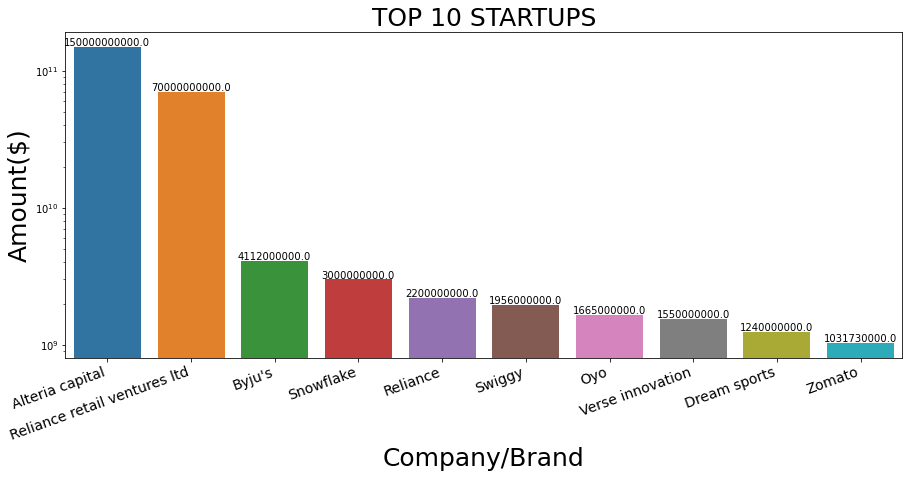

<Figure size 432x288 with 0 Axes>

In [90]:
# Plotting graph for Top 10 Startups
plt.figure(figsize=(15,6))
plt.title('TOP 10 STARTUPS',fontsize=25)
plt.ylabel('Amount($)',fontsize=25)
plt.xlabel('Company/Brand',fontsize=25)
p=sns.barplot(x='Company/Brand',y='Amount($)',data=top_10_startups)
p.set_yscale('log')
show_values(p)
plt.setp(p.get_xticklabels(), rotation=20, ha='right', fontsize=14) # Function to avoid overlapping of x-ticks
plt.show()
plt.savefig('top10startups.png',dpi=300)

 The above Output shows the top 10 startups funded between 2018 to 2021

### - Now Lets have a closer look at each of the Top 10 Companies/Brand, their Sectors, and What they do

In [91]:
# Locating the Top 10 Companies/Brand
a=data.loc[data['Company/Brand'] == 'Alteria capital']
b=data.loc[data['Company/Brand'] == 'Reliance retail ventures ltd']
e=data.loc[data['Company/Brand'] == "Byju's"]
c=data.loc[data['Company/Brand'] == 'Snowflake']
d=data.loc[data['Company/Brand'] == 'Reliance']
f=data.loc[data['Company/Brand'] == 'Swiggy']
g=data.loc[data['Company/Brand'] == 'Oyo']
h=data.loc[data['Company/Brand'] == 'Verse innovation']
i=data.loc[data['Company/Brand'] == 'Dream sports']
j=data.loc[data['Company/Brand'] == 'Zomato']

In [92]:
# Merging all the dataset to display their Sector and What they do
merge = [a,b,c,d,e,f,g,h,i,j] 
merged=pd.concat(merge)
pd.set_option('display.max_colwidth', None)
merged[['Company/Brand','Sector', 'What it does']].drop(index=[542,739,941,977,1109,1233,1550,1650,2308,2335,
                                               2392,2406,2532,1414,2621,101,1723,148,611,
                                               1820,2121,2202,2016,642,630,963,982,1416,444,862]).reset_index(drop=True)
                                               

,Company/Brand,Sector,What it does
0,Alteria capital,Technology sector,Alteria Capital is a Venture debt firm .
1,Reliance retail ventures ltd,retail,"Reliance Retail offers online shopping and a chain of neighborhood stores, supermarkets, and wholesale/specialty stores."
2,Snowflake,Technology sector,Snowflake is a cloud data platform that provides a data warehouse-as-a-service designed for the cloud.
3,Reliance,multinational conglomerate company,"Reliance owns businesses across India engaged in energy, petrochemicals, textiles, natural resources"
4,Byju's,Technology sector,BYJU’s is an edtech company that is reinventing how students learn through its learning app.
5,Swiggy,Technology sector,Platform to order food online from restaurants and getting it delievered
6,Oyo,hospitality,OYO operates a branded network of hotels designed to offer standardized stay experiences.
7,Verse innovation,media,"The core of the company (VerSe Innovation), is the idea that technology can help bridge the digital divide."
8,Dream sports,sports,"Dream Sports is India’s leading sports technology company with brands such as Dream11, world’s largest fantasy sports platform"
9,Zomato,Technology sector,Online food delivery and restaurant discovery platform


###### A closer look at each of the Top 10 Companies/Brand, their Sectors, and What they do

## Q2. Yearly trend in the number of startups funded

In [93]:
pd.DataFrame(data.groupby('Funding_year')['Company/Brand'].count().sort_values(ascending=False))

,Company/Brand
Funding_year,
2021,1209
2020,1055
2018,526
2019,89


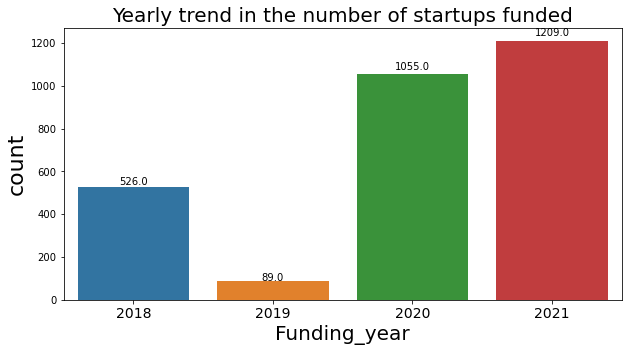

In [94]:
# Plotting graph for Yearly trend in the number of startups funded
plt.figure(figsize=(10,5))
plt.title('Yearly trend in the number of startups funded',fontsize=20)
plt.ylabel('Count',fontsize=22)
plt.xlabel('Funding Year',fontsize=20)
plt.xticks(fontsize=14)
p=sns.countplot(x='Funding_year',data=data)
show_values(p)
plt.savefig('StartupsPerYear.png',dpi=300)

From the plot, we can see that 2021 saw the most number of startups being funded. The number of startups being funded have been increasing from 2018 but had a sharp decline in 2019

## Q3. Yearly trend in the total funds raised by startups from 2018 to 2021

In [95]:
YearlyTotal=pd.DataFrame(data.groupby('Funding_year')['Amount($)'].sum().reset_index())
YearlyTotal['Amount($)']=YearlyTotal['Amount($)'].apply(lambda x: math.ceil(x))
YearlyTotal

,Funding_year,Amount($)
0,2018,4398782028
1,2019,3336433200
2,2020,91445499604
3,2021,179874412000


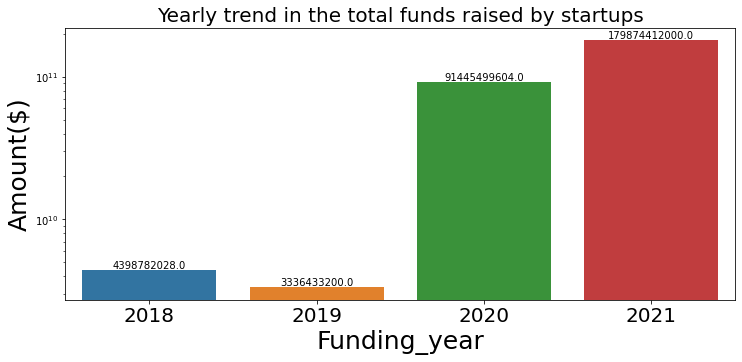

In [96]:
#Plotting a graph for Yearly trend in the amount of funds raised by startups
plt.figure(figsize=(12,5))
plt.title('Yearly trend in the total funds raised by startups',fontsize=20)
plt.xticks(fontsize=20,rotation='horizontal')
plt.ylabel('Total Funds Raised',fontsize=25)
plt.xlabel('Funding Year',fontsize=25)
p=sns.barplot(x='Funding_year',y='Amount($)',data=YearlyTotal)
show_values(p)
p.set_yscale('log')
plt.savefig('YearlyAmountTotal.png',dpi=300)
plt.show()

##  Q4.	Sector with the maximum number of startups

In [111]:
sector_graph=data[data['Sector']!='unknown']
sector_graph= pd.DataFrame(sector_graph.groupby('Sector')['Company/Brand'].count().sort_values(ascending=False).reset_index().head(10))
sector_graph

,Sector,Company/Brand
0,Technology sector,952
1,financial services,77
2,e-commerce,75
3,healthcare,67
4,automotive,39
5,food & beverages,39
6,gaming,35
7,logistics,34
8,computer software,31
9,saas,30


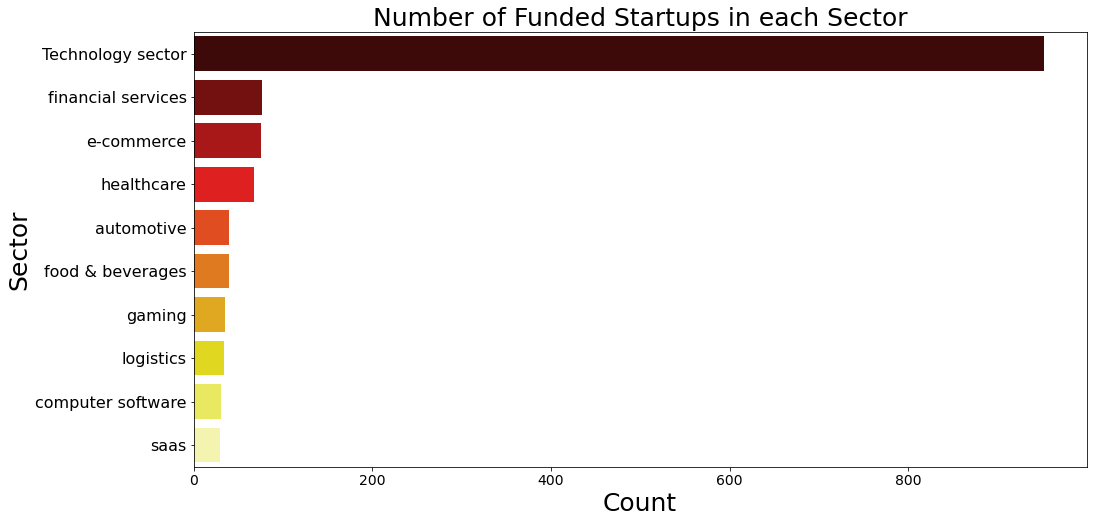

In [112]:
# Plotting grapg for Sector with the maximum number of startups
graph = data[data['Sector']!='unknown'].groupby('Sector')['Company/Brand'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(16,8))
plt.title('Number of Funded Startups in each Sector',fontsize=25)
plt.ylabel('Sectors',fontsize=25)
plt.xlabel('Count',fontsize=25)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
sns.barplot(graph.values,graph.index,palette='hot')
plt.show()

## Q5.	Sectors that raised the highest amount of funding from 2018 to 2021

In [99]:
SectorAmount=pd.DataFrame(data.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).reset_index().head(10))
SectorAmount['Amount($)']=SectorAmount['Amount($)'].apply(lambda x: math.ceil(x))
SectorAmount

,Sector,Amount($)
0,Technology sector,169317705900
1,retail,70542380000
2,e-commerce,2892058500
3,multinational conglomerate company,2200000000
4,automotive,2111805000
5,financial services,1757668700
6,hospitality,1622895000
7,food delivery,1460000000
8,insurance,1096663000
9,innovation management,1000500000


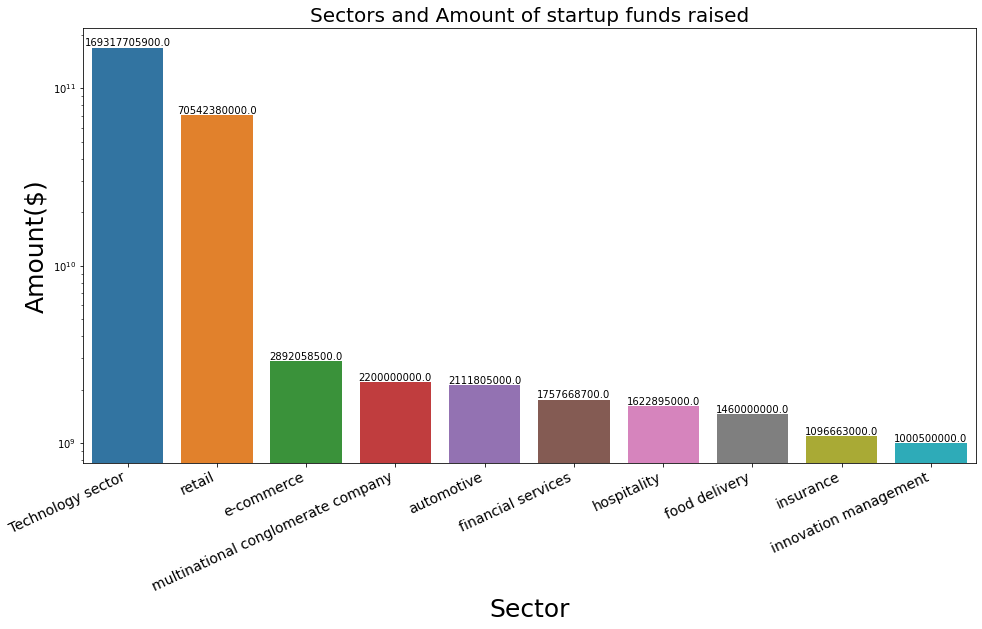

In [100]:
# Plotting a graph for Sectors and Amount of funds raised
plt.figure(figsize=(16,8))
plt.title('Sectors and Amount of startup funds raised',fontsize=20)
plt.ylabel('Total Funds Raised',fontsize=25)
plt.xlabel('Sector',fontsize=25)
p=sns.barplot(x='Sector',y='Amount($)',data=SectorAmount)
p.set_yscale('log')
plt.setp(p.get_xticklabels(), rotation=25, ha='right', fontsize=14) # Function to avoid overlapping of x-ticks
show_values(p)
plt.savefig('SectorAmount.png',dpi=300)
plt.show()

## Q6.	Cities with the maximum number of startups

In [101]:
cities=data[data['HeadQuarter']!='Not Specified']
cities=cities['HeadQuarter'].value_counts().sort_values(ascending=False).head(10)
cities

Bangalore    923
Mumbai       474
Gurugram     319
New Delhi    232
Chennai      106
Pune         105
Delhi         88
Noida         86
Hyderabad     78
Jaipur        31
Name: HeadQuarter, dtype: int64

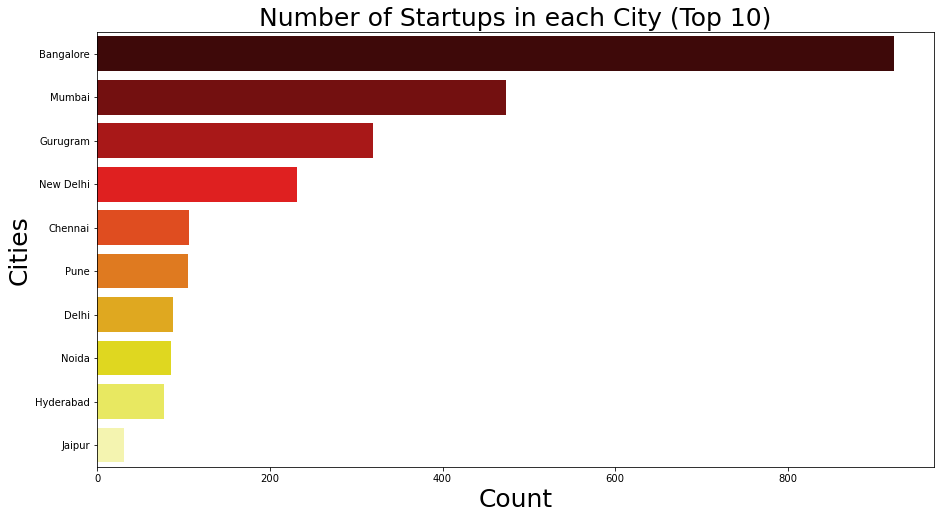

In [102]:
#Plotting a graph for Number of Startups in each city(Top 10)
plt.figure(figsize=(15,8))
plt.title('Number of Startups in each City (Top 10)',fontsize=25)
plt.ylabel('Cities',fontsize=25)
plt.xlabel('Count',fontsize=25)
sns.barplot(cities.values,cities.index,palette='hot')
plt.show()

## Q7. The most common Investment Types

In [103]:
types= pd.DataFrame(data['Stage'].value_counts().head(10))
types

,Stage
Seed,608
Series A,305
Pre-series A,290
Series B,134
Series C,116
Seed Round,79
Pre-seed,58
Series D,50
Debt,45
Angel,37


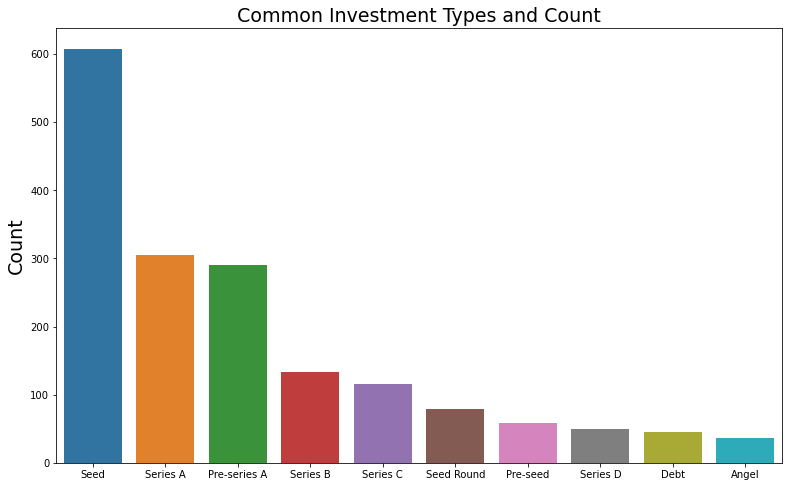

In [104]:
# Plotting a graph for Common Investment Types and Count
graph_data=data['Stage'].value_counts().head(10)
plt.figure(figsize=(13,8))
plt.ylabel('Count',fontsize=19)
plt.title('Common Investment Types and Count',fontsize=19)
sns.barplot(graph_data.index,graph_data.values)
plt.savefig('CommonInvestmentTypes.png',dpi=300)

## Q8. Top investors by number of startups funded from 2018 to 2021 

In [105]:
# Checking the value count for the unique number of investors 
data['Investor'].value_counts().head(80)

Undisclosed Investors                                  644
Sequoia Capital                                         96
Inflection Point Ventures                               36
Mumbai Angels Network                                   35
Venture Catalysts                                       32
                                                      ... 
RB Investments Pte. Ltd, Goldman Sachs                   2
Ascent Capital, Iron Pillar                              2
Info Edge                                                2
Techstars Bangalore Accelerator, Techstars               2
Dragoneer Investment Group, Tiger Global Management      2
Name: Investor, Length: 80, dtype: int64

From the above information, we see that a startup can be funded by multiple investors separated by commas. So to find out the Investor who has funded maximum number of companies, we need to devise a way to search each row for occurence of each investors name and count it. We will use re.search() method for this task. Below is the devised algorithm to find out actual number of startups funded by each investor by analysing rows with multiple investor names.

*Note:* We will not consider that startups have got multiple fundings at different periods, We are just counting the number of startups that each investor funded once, or more than once at different point of times

In [106]:
investors_startups_funded={}
unique_name=data['Investor'].unique()
name=np.array(data['Investor'].values)
for i in range(len(unique_name)):
    for j in range(len(name)):
        if(re.search(unique_name[i],name[j])):
            investors_startups_funded[unique_name[i]]=investors_startups_funded.get(unique_name[i],0)+1

In [107]:
# Defining a variable for Top 10 Investors by the number of startps funded
top_investors = pd.DataFrame({'Investor Name':list(investors_startups_funded.keys()),
                              'Number of Startups Funded':list(investors_startups_funded.values())}).sort_values('Number of Startups Funded',ascending=False)

In [108]:
# Removing 'Undisclosed Investors' from Top Investors list
top_investors[top_investors['Investor Name']!='Undisclosed Investors'].reset_index(drop=True).head(10)

,Investor Name,Number of Startups Funded
0,Sequoia Capital,96
1,Accel,80
2,Venture Catalysts,61
3,Inflection Point Ventures,47
4,9Unicorns,41
5,Tiger Global,39
6,Titan Capital,37
7,Mumbai Angels Network,35
8,Y Combinator,30
9,Better Capital,29


In [109]:
# Defining graph data
graph=investors_startups_funded
del graph['Undisclosed Investors']
index=list(graph.keys())
values =list(graph.values())

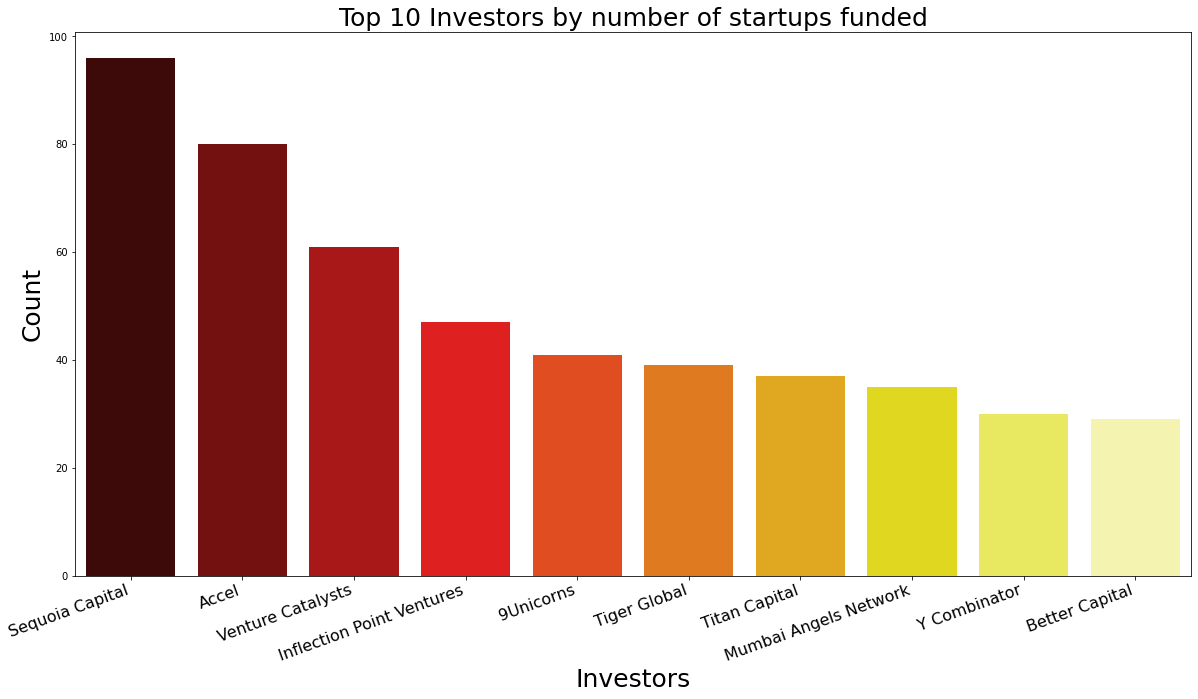

In [110]:
# Plotting a graph for Top investors by number of startups funded
graph_data=pd.Series(values,index=index).sort_values(ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.xlabel('Investors',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Top 10 Investors by number of startups funded',fontsize=25)
p=sns.barplot(graph_data.index,graph_data.values,palette='hot')
plt.setp(p.get_xticklabels(), rotation=20, ha='right', fontsize=16) # Function to avoid overlapping of x-ticks
plt.savefig('Investors.png',dpi=300)

Note: These investors have either funded startups as being the only investor or along with other investors.

# Conclusion

From this analysis, we have gotten some information and insights into the Indian startup ecosystem.
we got to know that startups in the Technology sector have received the highest amount of funding from 2018 to 2021, and are also the highest based on the number of startups in each sector and can therefore conclude that the Indian startup ecosystem is being championed by the Technology sector. we also got to know about the yearly trend in the number of startups funded, and many more interesting observations about the Indian Startup Ecosystem. I hope that this analysis can guide organizations or teams that are trying to venture into the Indian start-up ecosystem.